In [453]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.proportion import proportion_confint
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.contingency_tables import cochrans_q, mcnemar

In [454]:
df = pd.read_csv('LLM_exam_dataset.csv')
df = df.drop(['Unnamed: 2','Unnamed: 6','Unnamed: 10','General promt'], axis=1)
sns.set_palette('pastel')

# Data

Encoding machine learning data

In [455]:
encode = LabelEncoder()

df_ML = df[df['Exam set and course'].str.contains('ML', na=False)].copy()

combined_series = pd.concat([df_ML['Correct answer'], df_ML['Chat GPT 4o'], df_ML['Chat GPT 4'], df_ML['Gemini Advance']])

encode = LabelEncoder()
encode.fit(combined_series)

df_ML['Correct answer'] = encode.fit_transform(df_ML['Correct answer'])
df_ML['Chat GPT 4o'] = encode.fit_transform(df_ML['Chat GPT 4o'])
df_ML['Chat GPT 4'] = encode.fit_transform(df_ML['Chat GPT 4'])
df_ML['Gemini Advance'] = encode.fit_transform(df_ML['Gemini Advance'])

df[df['Exam set and course'].str.contains('ML', na=False)] = df_ML

In [456]:
LLM = ['Chat GPT 4o','Chat GPT 4','Gemini Advance']

def mean_correct(df):
    return np.mean(df['Chat GPT 4o']==df['Correct answer']), np.mean(df['Chat GPT 4']==df['Correct answer']), np.mean(df['Gemini Advance']==df['Correct answer'])

def confidence_intercval(df):
    GPT4o_correct = df['Chat GPT 4o']==df['Correct answer']
    GPT4_correct = df['Chat GPT 4']==df['Correct answer']
    Gemini_correct = df['Gemini Advance']==df['Correct answer']

    return [proportion_confint(np.sum(GPT4o_correct), len(GPT4o_correct)), proportion_confint(np.sum(GPT4_correct), len(GPT4_correct)), proportion_confint(np.sum(Gemini_correct), len(Gemini_correct))]

def cochrans(df):
    GPT4o_correct = df['Chat GPT 4o']==df['Correct answer']
    GPT4_correct = df['Chat GPT 4']==df['Correct answer']
    Gemini_correct = df['Gemini Advance']==df['Correct answer']

    print(cochrans_q([GPT4o_correct,GPT4_correct,Gemini_correct]))

def McNemar(df):
    GPT4o_correct = df['Chat GPT 4o']==df['Correct answer']
    GPT4_correct = df['Chat GPT 4']==df['Correct answer']
    Gemini_correct = df['Gemini Advance']==df['Correct answer']

    print(mcnemar([GPT4o_correct,Gemini_correct]))
    

def dunns(df):
    GPT4o_correct = df['Chat GPT 4o']==df['Correct answer']
    GPT4_correct = df['Chat GPT 4']==df['Correct answer']
    Gemini_correct = df['Gemini Advance']==df['Correct answer']

    dunn = posthoc_dunn([GPT4o_correct,GPT4_correct,Gemini_correct], p_adjust='bonferroni',val_col='value', group_col='group',)

    dunn.columns = LLM
    dunn.index = LLM

    return dunn

# All data

In [457]:
GPT4o_correct = df['Chat GPT 4o']==df['Correct answer']
GPT4_correct = df['Chat GPT 4']==df['Correct answer']
Gemini_correct = df['Gemini Advance']==df['Correct answer']

In [458]:
mean_correct(df)

(0.6783625730994152, 0.6257309941520468, 0.49707602339181284)

In [459]:
confidence_intercval(df)

[(0.6083518981124314, 0.7483732480863989),
 (0.5531979672957567, 0.698264021008337),
 (0.42213620886257885, 0.5720158379210468)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


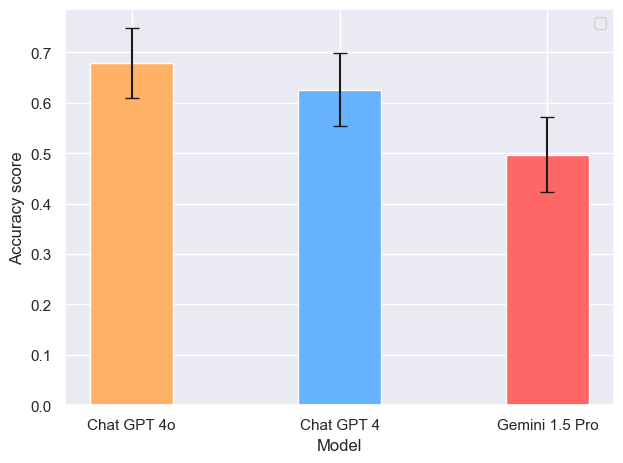

In [460]:
LLM = ['Chat GPT 4o', 'Chat GPT 4', 'Gemini 1.5 Pro']

confidence_intercval_all = confidence_intercval(df)
mean_all = mean_correct(df)
all_error = [(high - low) / 2 for low, high in confidence_intercval_all]

bar_width = 0.4
index = np.arange(len(LLM))

fig, ax = plt.subplots()

colors = ['#FFB266', '#66B2FF', '#FF6666']

bars1 = ax.bar(index, mean_all, bar_width, yerr=all_error, capsize=5, color=colors)

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy score')
ax.set_xticks(index)
ax.set_xticklabels(LLM)
ax.legend()

plt.tight_layout()
# plt.savefig('Bar_plot_all_data.png', dpi=300, bbox_inches='tight')
plt.show()

In [461]:
cochrans(df)

df          170
pvalue      2.5910275329631083e-07
statistic   279.1781088713604


In [462]:
crosstab = pd.crosstab(GPT4o_correct, Gemini_correct)
print(mcnemar(crosstab))

crosstab = pd.crosstab(GPT4_correct, Gemini_correct)
print(mcnemar(crosstab))

crosstab = pd.crosstab(GPT4_correct, GPT4o_correct)
print(mcnemar(crosstab))

pvalue      6.530630444913366e-05
statistic   14.0
pvalue      0.005354859650800294
statistic   18.0
pvalue      0.2806097176983541
statistic   23.0


# Machine learning and Data Mining

In [463]:
GPT4o_correct_ml = df[df['Exam set and course'].str.contains('ML', na=False)]['Chat GPT 4o']==df[df['Exam set and course'].str.contains('ML', na=False)]['Correct answer']
GPT4_correct_ml = df[df['Exam set and course'].str.contains('ML', na=False)]['Chat GPT 4']==df[df['Exam set and course'].str.contains('ML', na=False)]['Correct answer']
Gemini_correct_ml = df[df['Exam set and course'].str.contains('ML', na=False)]['Gemini Advance']==df[df['Exam set and course'].str.contains('ML', na=False)]['Correct answer']

In [464]:
mean_correct(df[df['Exam set and course'].str.contains('ML', na=False)])

(0.5185185185185185, 0.4691358024691358, 0.3333333333333333)

In [465]:
confidence_intercval(df[df['Exam set and course'].str.contains('ML', na=False)])

[(0.4097063384822368, 0.6273306985548002),
 (0.36045656344771804, 0.5778150414905535),
 (0.2306737907889127, 0.4359928758777539)]

In [466]:
cochrans(df[df['Exam set and course'].str.contains('ML', na=False)])

df          80
pvalue      0.006769659696587191
statistic   114.6046511627907


In [467]:
crosstab = pd.crosstab(GPT4o_correct_ml, Gemini_correct_ml)
print(mcnemar(crosstab))

crosstab = pd.crosstab(GPT4_correct_ml, Gemini_correct_ml)
print(mcnemar(crosstab))

crosstab = pd.crosstab(GPT4_correct_ml, GPT4o_correct_ml)
print(mcnemar(crosstab))

pvalue      0.016673847800120715
statistic   10.0
pvalue      0.06142834573984146
statistic   9.0
pvalue      0.5966148958541453
statistic   14.0


# Introduction to Statistic

In [468]:
GPT4o_correct_st = df[df['Exam set and course'].str.contains('ST', na=False)]['Chat GPT 4o']==df[df['Exam set and course'].str.contains('ST', na=False)]['Correct answer']
GPT4_correct_st = df[df['Exam set and course'].str.contains('ST', na=False)]['Chat GPT 4']==df[df['Exam set and course'].str.contains('ST', na=False)]['Correct answer']
Gemini_correct_st = df[df['Exam set and course'].str.contains('ST', na=False)]['Gemini Advance']==df[df['Exam set and course'].str.contains('ST', na=False)]['Correct answer']

In [469]:
mean_correct(df[df['Exam set and course'].str.contains('ST', na=False)])

(0.8222222222222222, 0.7666666666666667, 0.6444444444444445)

In [470]:
confidence_intercval(df[df['Exam set and course'].str.contains('ST', na=False)])

[(0.7432343930847254, 0.901210051359719),
 (0.6792853630379795, 0.854047970295354),
 (0.5455496771673091, 0.7433392117215799)]

In [471]:
cochrans(df[df['Exam set and course'].str.contains('ST', na=False)])

df          89
pvalue      0.0005179587206971141
statistic   139.3586544887503


In [472]:
crosstab = pd.crosstab(GPT4o_correct_st, Gemini_correct_st)
print(mcnemar(crosstab))

crosstab = pd.crosstab(GPT4_correct_st, Gemini_correct_st)
print(mcnemar(crosstab))

crosstab = pd.crosstab(GPT4_correct_st, GPT4o_correct_st)
print(mcnemar(crosstab))

pvalue      0.001543879508972168
statistic   4.0
pvalue      0.06142834573984146
statistic   9.0
pvalue      0.4048728942871094
statistic   9.0


# Comparing different courses

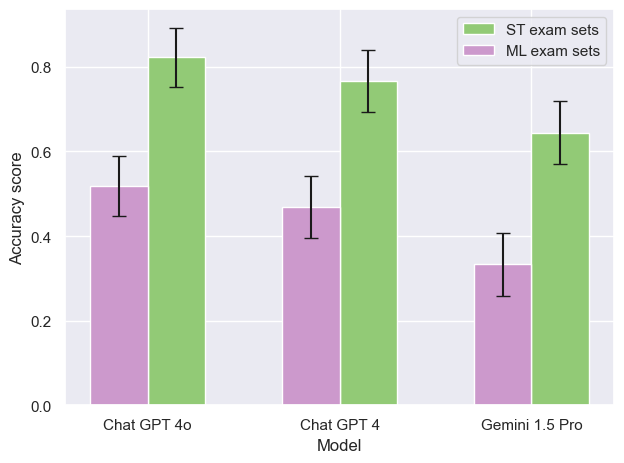

In [473]:
LLM = ['Chat GPT 4o','Chat GPT 4','Gemini 1.5 Pro']

confidence_intercval_stat = confidence_intercval(df[df['Exam set and course'].str.contains('ST', na=False)])
confidence_intercval_ml = confidence_intercval(df[df['Exam set and course'].str.contains('ML', na=False)])

mean_stat = mean_correct(df[df['Exam set and course'].str.contains('ST', na=False)])
mean_ml = mean_correct(df[df['Exam set and course'].str.contains('ML', na=False)])

stat_error = [(high - low) / 2 for low, high in confidence_intercval_stat]
ml_error = [(high - low) / 2 for low, high in confidence_intercval_ml]

bar_width = 0.3
index = np.arange(len(LLM))

fig, ax = plt.subplots()

bars2 = ax.bar(index+bar_width, mean_stat, bar_width, yerr=all_error, label='ST exam sets', capsize=5, color='#92CA76')
bars3 = ax.bar(index, mean_ml, bar_width, yerr=all_error, label='ML exam sets', capsize=5, color='#CC99CC')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy score')
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(LLM)
ax.legend()

plt.tight_layout()
# plt.savefig('Bar_plot_course.png', dpi=300, bbox_inches='tight')
plt.show()

In [474]:
from statsmodels.stats.multitest import fdrcorrection

fdrcorrection([2.5910275329631083e-07,6.530630444913366e-05,0.005354859650800294, 0.2806097176983541, 0.006769659696587191, 0.016673847800120715, 0.06142834573984146, 0.5966148958541453, 0.0005179587206971141, 0.001543879508972168, 0.06142834573984146, 0.4048728942871094], alpha=0.05)

(array([ True,  True,  True, False,  True,  True, False, False,  True,
         True, False, False]),
 array([3.10923304e-06, 3.91837827e-04, 1.28516632e-02, 3.36731661e-01,
        1.35393194e-02, 2.85837391e-02, 8.19044610e-02, 5.96614896e-01,
        2.07183488e-03, 4.63163853e-03, 8.19044610e-02, 4.41679521e-01]))